In [478]:
########################################
# importing packages
########################################
import matplotlib.pyplot as plt                        # data visualization
import pandas as pd                                    # data science essentials
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix

#logistic
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus

# Hypertuning packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

#Ensemble Modeling packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


########################################
# loading data and setting display options
########################################
# loading data
chef = pd.read_excel('./datasets/Apprentice_Chef_Dataset.xlsx')


In [479]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [480]:
# pulling up data dictionary
chef_description = pd.read_excel('./datasets/Apprentice_Chef_Data_Dictionary.xlsx')


# displaying the data dictionary
chef_description

,Feature,Data Type,Description
0,REVENUE,Float,Total revenue generated from each customer. No...
1,CROSS_SELL_SUCCESS,Integer,"Success of the cross-sell promotion (1 = yes, ..."
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name of customer
5,FAMILY_NAME,string,Last name of customer
6,TOTAL_MEALS_ORDERED,Integer,Total number of meals ordered by each customer...
7,UNIQUE_MEALS_PURCH,Integer,Number of unique meal sets ordered by each cus...
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times each customer made contact wit...
9,PRODUCT_CATEGORIES_VIEWED,Integer,"Total number of meal categories viewed (vegan,..."


In [481]:
# checking for missing values
chef.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [482]:
# splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [483]:
#concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, email_df['personal_email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'personal_email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
mcdonalds.com        28
jnj.com              28
cocacola.com         28
nike.com             27
apple.com            27
ge.org               26
ibm.com              26
dupont.com           26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
pg.com               22
verizon.com          22
mmm.com              22
caterpillar.com      22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
unitedtech.com       18
goldmansacs.com      18
intel.com            17
homedepot.com        17
Name: personal_email_domain, dtype: int64

In [484]:
personal_email_domains = ['@gmail.com','@yahoo.com','@protonmail.com']
junk_email_domains  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['personal_email_domain']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')
    
    else:
        placeholder_lst.append('professional')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [485]:
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [486]:
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = chef)


# checking results
chef['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [487]:
# one hot encoding variables
skill       = pd.get_dummies(chef['MASTER_CLASSES_ATTENDED'])
domain_group = pd.get_dummies(chef['domain_group'])


# joining codings together
chef = chef.join([skill, domain_group])


# checking results
chef.columns

Index([                    'REVENUE',          'CROSS_SELL_SUCCESS',
                              'NAME',                       'EMAIL',
                        'FIRST_NAME',                 'FAMILY_NAME',
               'TOTAL_MEALS_ORDERED',          'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE',   'PRODUCT_CATEGORIES_VIEWED',
           'AVG_TIME_PER_SITE_VISIT',               'MOBILE_NUMBER',
         'CANCELLATIONS_BEFORE_NOON',    'CANCELLATIONS_AFTER_NOON',
            'TASTES_AND_PREFERENCES',                   'PC_LOGINS',
                     'MOBILE_LOGINS',                 'WEEKLY_PLAN',
                  'EARLY_DELIVERIES',             'LATE_DELIVERIES',
                    'PACKAGE_LOCKER',         'REFRIGERATED_LOCKER',
                 'AVG_PREP_VID_TIME',          'LARGEST_ORDER_SIZE',
           'MASTER_CLASSES_ATTENDED',          'MEDIAN_MEAL_RATING',
              'AVG_CLICKS_PER_VISIT',         'TOTAL_PHOTOS_VIEWED',
             'personal_email_domai

In [488]:
# dropping unfavorite features and categorical variables after they've been encoded
chef = chef.drop(labels = ['FIRST_NAME','FAMILY_NAME','NAME','EMAIL','MASTER_CLASSES_ATTENDED','domain_group','personal_email_domain'],
                        axis = 1)

# checking results
chef.columns

Index([                    'REVENUE',          'CROSS_SELL_SUCCESS',
               'TOTAL_MEALS_ORDERED',          'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE',   'PRODUCT_CATEGORIES_VIEWED',
           'AVG_TIME_PER_SITE_VISIT',               'MOBILE_NUMBER',
         'CANCELLATIONS_BEFORE_NOON',    'CANCELLATIONS_AFTER_NOON',
            'TASTES_AND_PREFERENCES',                   'PC_LOGINS',
                     'MOBILE_LOGINS',                 'WEEKLY_PLAN',
                  'EARLY_DELIVERIES',             'LATE_DELIVERIES',
                    'PACKAGE_LOCKER',         'REFRIGERATED_LOCKER',
                 'AVG_PREP_VID_TIME',          'LARGEST_ORDER_SIZE',
                'MEDIAN_MEAL_RATING',        'AVG_CLICKS_PER_VISIT',
               'TOTAL_PHOTOS_VIEWED',             'number_of_names',
                                   0,                             1,
                                   2,                             3,
                              'jun

In [489]:
# relabeling columns
chef.columns = [                    'REVENUE',          'CROSS_SELL_SUCCESS',
               'TOTAL_MEALS_ORDERED',          'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE',   'PRODUCT_CATEGORIES_VIEWED',
           'AVG_TIME_PER_SITE_VISIT',               'MOBILE_NUMBER',
         'CANCELLATIONS_BEFORE_NOON',    'CANCELLATIONS_AFTER_NOON',
            'TASTES_AND_PREFERENCES',                   'PC_LOGINS',
                     'MOBILE_LOGINS',                 'WEEKLY_PLAN',
                  'EARLY_DELIVERIES',             'LATE_DELIVERIES',
                    'PACKAGE_LOCKER',         'REFRIGERATED_LOCKER',
                 'AVG_PREP_VID_TIME',          'LARGEST_ORDER_SIZE',          'MEDIAN_MEAL_RATING',
              'AVG_CLICKS_PER_VISIT',  'TOTAL_PHOTOS_VIEWED',        'number_of_names',
                'skill_0','skill_1','skill_2','skill_3',
                              'junk',                    'personal',
                      'professional']


# checking results
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
       'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
       'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'number_of_names', 'skill_0', 'skill_1', 'skill_2', 'skill_3', 'junk',
       'personal', 'professional'],
      dtype='object')

In [490]:
# User define function

In [491]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [492]:
df_corr = chef.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
professional                   0.19
number_of_names                0.16
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
skill_1                        0.05
CONTACTS_W_CUSTOMER_SERVICE    0.04
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
personal                       0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
LARGEST_ORDER_SIZE             0.02
EARLY_DELIVERIES               0.02
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_MEALS_ORDERED            0.01
LATE_DELIVERIES                0.01
TOTAL_PHOTOS_VIEWED            0.01
skill_2                        0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
AVG_CLICKS_PER_VISIT          -0.04
skill_3                       -0.04
MOBILE_LOGINS               

In [493]:
# declaring explanatory variables
chef_data = chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [494]:
chef.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,number_of_names,skill_0,skill_1,skill_2,skill_3,junk,personal,professional
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,13.508222,106.433710,1.834532,0.478931,0.440904,0.077081,0.003083,0.199897,0.442446,0.357657
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.333876,181.014124,0.778476,0.499684,0.496623,0.266789,0.055456,0.400026,0.496804,0.479434
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,13.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,15.000000,174.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,19.000000,1600.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [495]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [496]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [497]:
for val in chef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 number_of_names + 
 skill_0 + 
 skill_1 + 
 skill_2 + 
 skill_3 + 
 junk + 
 personal + 
 professional + 


In [498]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 number_of_names + 
 skill_0 + 
 skill_1 + 
 skill_2 + 
 skill_3 + 
 junk + 
 personal + 
 professional""",
                                         data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.533805
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1431
Method:                           MLE   Df Model:                           27
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                  0.1499
Time:                        23:28:26   Log-Likelihood:                -778.82
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 7.443e-43
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.2156        nan        nan        nan         nan         nan
REVENUE                        -0.0002   8.89e-05     -2.394      0.017      -0.000   -3.86e-05
TOTAL_MEALS_ORDERED            -0.0005      0.001     -0.323      0.747      -0.003       0.002
UNIQUE_MEALS_PURCH             -0.0113      0.026     -0.431      0.666      -0.063       0.040
CONTACTS_W_CUSTOMER_SERVICE     0.0507      0.028      1.796      0.073      -0.005       0.106
PRODUCT_CATEGORIES_VIEWED      -0.0175      0.021     -0.849      0.396      -0.058       0.023
AVG_TIME_PER_SITE_VISIT         0.0003      0.001      0.301      0.763      -0.002       0.002
MOBILE_NUMBER                   0.8987      0.179      5.023      0.000       0.548       1.249
CANCELLATIONS_BEFORE_NOON       0.2795      0.047      5.947      0.000       0.187       0.372
CANCELLATIONS_AFTER_NOON       -0.2471      0.144     -1.721      0.085      -0.528       0.034
TASTES_AND_PREFERENCES          0.3622      0.137      2.641      0.008       0.093       0.631
PC_LOGINS                       0.2386      0.109      2.195      0.028       0.026       0.452
MOBILE_LOGINS                  -0.1849      0.119     -1.552      0.121      -0.419       0.049
WEEKLY_PLAN                     0.0056      0.005      1.179      0.238      -0.004       0.015
EARLY_DELIVERIES                0.0659      0.028      2.353      0.019       0.011       0.121
LATE_DELIVERIES                 0.0163      0.023      0.713      0.476      -0.028       0.061
PACKAGE_LOCKER                  0.0328      0.149      0.221      0.825      -0.259       0.325
REFRIGERATED_LOCKER             0.4995      0.239      2.094      0.036       0.032       0.967
AVG_PREP_VID_TIME               0.0050      0.003      1.904      0.057      -0.000       0.010
LARGEST_ORDER_SIZE             -0.0773      0.070     -1.106      0.269      -0.214       0.060
MEDIAN_MEAL_RATING              0.1330      0.170      0.780      0.435      -0.201       0.467
AVG_CLICKS_PER_VISIT           -0.0185      0.052     -0.358      0.721      -0.120       0.083
number_of_names                 0.5530      0.095      5.835      0.000       0.367       0.739
skill_0                        -0.4989        nan        nan        nan         nan         nan
skill_1                        -0.2055        nan        nan        nan         nan         nan
skill_2                        -0.1875        nan        nan        nan         nan         nan
skill_3                        -1.3238        nan        nan        nan         nan         nan
junk                           -1.8436        nan        nan        nan         nan         nan
personal                       -0.4943        nan        nan        nan         nan         nan
professional                    0.1223        nan        nan        nan         nan         nan
=========================================================================

In [499]:
#Develop a model where all features are significant based on their p-values

In [500]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
MOBILE_NUMBER+
                                    REVENUE +
                                    CANCELLATIONS_BEFORE_NOON +
                                    TASTES_AND_PREFERENCES +
                                    PC_LOGINS +
                                    EARLY_DELIVERIES+
                                    REFRIGERATED_LOCKER+
                                    number_of_names
                                    """,
                                    data = chef_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.590401
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                 0.05981
Time:                        23:28:27   Log-Likelihood:                -861.40
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 4.609e-20
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.5476      0.618     -4.120      0.000      -3.760      -1.336
MOBILE_NUMBER                 0.7225      0.168      4.308      0.000       0.394       1.051
REVENUE                    3.549e-05   5.25e-05      0.676      0.499   -6.75e-05       0.000
CANCELLATIONS_BEFORE_NOON     0.2624      0.045      5.842      0.000       0.174       0.350
TASTES_AND_PREFERENCES        0.3586      0.128      2.812      0.005       0.109       0.609
PC_LOGINS                     0.1893      0.101      1.877      0.060      -0.008       0.387
EARLY_DELIVERIES              0.0506      0.026      1.955      0.051      -0.000       0.101
REFRIGERATED_LOCKER           0.4659      0.199      2.340      0.019       0.076       0.856
number_of_names               0.4743      0.088      5.364      0.000       0.301       0.648
=============================================================================================
"""

In [522]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
        'logit_full'  :        ['TOTAL_MEALS_ORDERED',          'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE',   'PRODUCT_CATEGORIES_VIEWED',
           'AVG_TIME_PER_SITE_VISIT',               'MOBILE_NUMBER',
         'CANCELLATIONS_BEFORE_NOON',    'CANCELLATIONS_AFTER_NOON',
            'TASTES_AND_PREFERENCES',                   'PC_LOGINS',
                     'MOBILE_LOGINS',                 'WEEKLY_PLAN',
                  'EARLY_DELIVERIES',             'LATE_DELIVERIES',
                    'PACKAGE_LOCKER',         'REFRIGERATED_LOCKER',
                 'AVG_PREP_VID_TIME',          'LARGEST_ORDER_SIZE',          'MEDIAN_MEAL_RATING',
              'AVG_CLICKS_PER_VISIT',          'number_of_names',
                'skill_0','skill_1','skill_2','skill_3',
                              'junk',                    'personal',
                      'professional'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON' ,
                                    'TASTES_AND_PREFERENCES' ,
                                    'number_of_names'
                                    ],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  :  ['REVENUE' ,'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON' ,
                                    'TASTES_AND_PREFERENCES' ,
                                    'PC_LOGINS' ,
                                    'EARLY_DELIVERIES',
                                    'REFRIGERATED_LOCKER',
                                    'number_of_names','skill_0','skill_1','skill_2','skill_3',  'junk',                    'personal',
                      'professional'
                                    ]

}

In [523]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'number_of_names', 'skill_0', 'skill_1', 'skill_2', 'skill_3', 'junk', 'personal', 'professional']


First Significant p-value Model:
--------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'number_of_names']


Second Significant p-value Model:
---------------------------------
['REVENUE', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'EARLY_DELIVER

In [531]:
chef

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,number_of_names,skill_0,skill_1,skill_2,skill_3,junk,personal,professional
0,393.0,1,14,6,12,10,48.00,1,3,1,...,17,0,1,1,0,0,0,0,0,1
1,1365.0,1,87,3,8,8,40.35,1,0,0,...,13,170,2,1,0,0,0,0,0,1
2,800.0,1,15,7,11,5,19.77,1,3,0,...,16,0,2,1,0,0,0,0,0,1
3,600.0,1,13,6,11,5,90.00,1,2,0,...,14,0,2,1,0,0,0,0,0,1
4,1490.0,1,47,8,6,10,40.38,1,0,0,...,12,205,2,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.0,0,87,8,8,7,108.90,1,0,0,...,11,0,2,0,0,1,0,0,1,0
1942,5829.0,0,244,4,7,2,133.91,1,1,2,...,10,424,2,0,1,0,0,0,1,0
1943,1900.0,0,57,2,8,4,102.71,1,2,0,...,12,480,2,1,0,0,0,0,1,0
1944,1600.0,0,74,3,10,10,638.87,0,0,0,...,11,796,1,0,0,0,1,0,1,0


In [532]:
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_data

,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,TASTES_AND_PREFERENCES,number_of_names
0,1,3,1,1
1,1,0,1,2
2,1,3,1,2
3,1,2,1,2
4,1,0,0,2
...,...,...,...,...
1941,1,0,1,2
1942,1,1,1,2
1943,1,2,1,2
1944,0,0,1,1


In [533]:
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']
chef_target

0       1
1       1
2       1
3       1
4       1
       ..
1941    0
1942    0
1943    0
1944    0
1945    1
Name: CROSS_SELL_SUCCESS, Length: 1946, dtype: int64

In [534]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']

# this is the exact code we were using before

X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7231
LogReg Testing  ACCURACY: 0.7207
LogReg Train-Test Gap   : 0.0024


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [535]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 49
False Positives: 107
False Negatives: 29
True Positives : 302



In [536]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6132


In [537]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.16)
('MOBILE_NUMBER', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.48)
('TASTES_AND_PREFERENCES', 0.27)
('number_of_names', 0.27)


In [538]:
# Classification Trees (CART Models)

In [539]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [540]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.6735
Full Tree AUC Score: 0.6192


In [541]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 73
False Positives: 83
False Negatives: 76
True Positives : 255



In [542]:
# Puned tree

In [543]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(X_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7512
Testing  ACCURACY: 0.7803
AUC Score        : 0.713


In [544]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 82
False Positives: 74
False Negatives: 33
True Positives : 298



In [545]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6132         (49, 107, 29, 302)
Full Tree     0.6192         (73, 83, 76, 255)
Pruned Tree   0.713         (82, 74, 33, 298)



In [546]:
#Classification Modeling with KNN

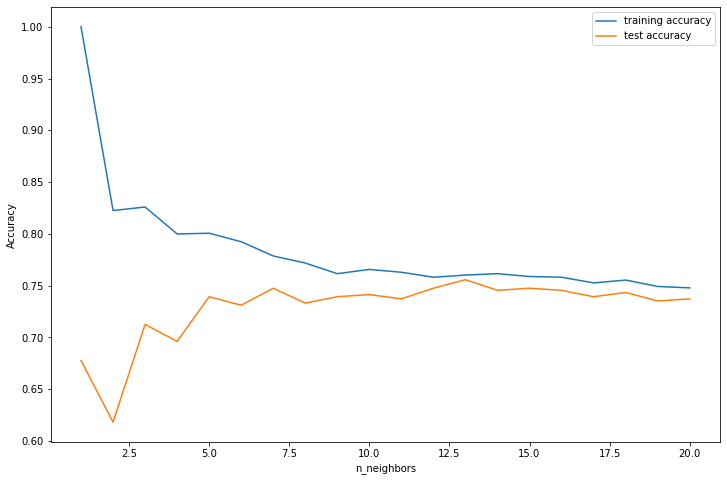

The optimal number of neighbors is: 13


In [548]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data        = chef_data,
                                  y_data        = chef_target,
                                  response_type = 'class')

In [568]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7375
Testing  ACCURACY: 0.7064
AUC Score        : 0.5942


In [569]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 82
False Positives: 74
False Negatives: 33
True Positives : 298



In [570]:
# Hyperparameter Tuning 

In [598]:
# train/test split with the logit_sig variables
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

In [599]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-599-8b2c492ff40a>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 0.6}
Tuned CV AUC      : 0.6549


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [600]:
# checking the results of RandomizedSearch CV
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.15956569, 0.08670425, 0.05159195, 0.04564301, 0.161484  ,
        0.09777427, 0.16400941, 0.03993305, 0.16233166, 0.15849606,
        0.06434838, 0.08784175, 0.04214176, 0.16129557, 0.10947029,
        0.16043663, 0.03301565, 0.10177501, 0.16175111, 0.10512431,
        0.0431598 , 0.09208298, 0.0923512 , 0.16087993, 0.08988873,
        0.16194598, 0.15722267, 0.03881772, 0.15991267, 0.08460999,
        0.16373197, 0.04289762, 0.08540471, 0.08215038, 0.07069016,
        0.09411073, 0.10480873, 0.10946361, 0.16592304, 0.05054426,
        0.08244713, 0.04731337, 0.16070875, 0.15845442, 0.0993549 ,
        0.07370567, 0.05057931, 0.04591155, 0.15982167, 0.04799501,
        0.02837745, 0.16248775, 0.15720638, 0.15879067, 0.08094327,
        0.16072226, 0.03561568, 0.16025194, 0.09222968, 0.08663678,
        0.0809261 , 0.16387439, 0.15746808, 0.04599182, 0.16180174,
        0.08571037, 0.07629506, 0.16027069, 0.02929934, 0.04230634,
        0.03476755, 0.06879314,

In [601]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=0.6, max_iter=1000, random_state=219, solver='newton-cg',
                   warm_start=True)

In [602]:
# Tuned LR	

In [603]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(X_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7443
LR Tuned Testing  ACCURACY: 0.7474
LR Tuned AUC Score        : 0.6549


In [606]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 62
False Positives: 94
False Negatives: 29
True Positives : 302



In [607]:
# loading model performance

# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6132,0.7231,0.7207,"(49, 107, 29, 302)"
1,Full Tree,0.6192,1.0000,0.6735,"(73, 83, 76, 255)"
2,Pruned Tree,0.7130,0.7512,0.7803,"(82, 74, 33, 298)"
3,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
4,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
5,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
6,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"


In [608]:
# Tuned Tree	

In [609]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-609-4dc3f988466f>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-609-4dc3f988466f>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 16, 'max_depth': 3, 'criterion': 'gini'}
Tuned Training AUC: 0.7032


In [610]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7402
Testing  ACCURACY: 0.7762
AUC Score        : 0.732


In [611]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 95
False Positives: 61
False Negatives: 48
True Positives : 283



In [612]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6132,0.7231,0.7207,"(49, 107, 29, 302)"
1,Full Tree,0.6192,1.0000,0.6735,"(73, 83, 76, 255)"
2,Pruned Tree,0.7130,0.7512,0.7803,"(82, 74, 33, 298)"
3,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
4,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
5,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
6,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
7,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"


In [613]:
 #Ensemble Modeling

In [614]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [621]:
# train/test split with the logit_sig variables
chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

In [622]:
#Random Forest (Full)	

In [623]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [624]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7556
AUC Score        : 0.6711


<ipython-input-614-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


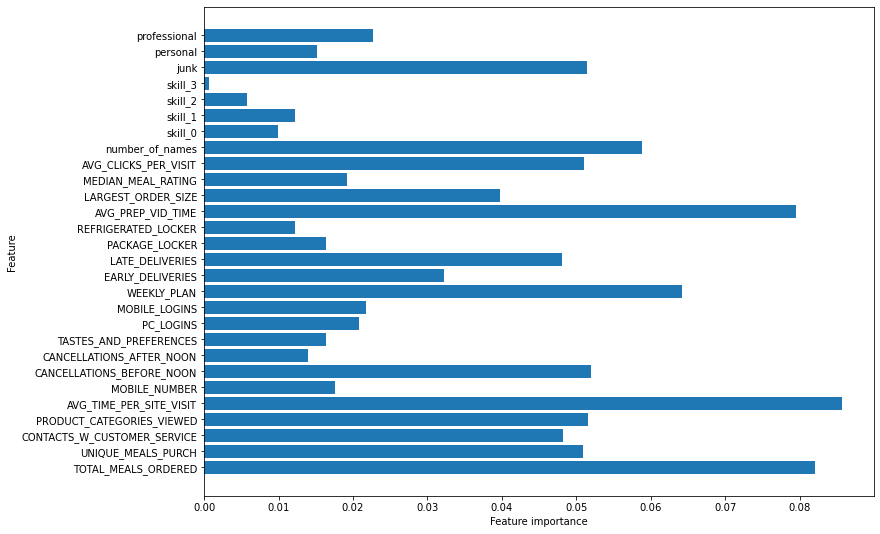

In [625]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [626]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 68
False Positives: 88
False Negatives: 31
True Positives : 300



In [627]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6132,0.7231,0.7207,"(49, 107, 29, 302)"
1,Full Tree,0.6192,1.0000,0.6735,"(73, 83, 76, 255)"
2,Pruned Tree,0.7130,0.7512,0.7803,"(82, 74, 33, 298)"
3,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
4,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
5,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
6,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
7,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"
8,Random Forest (Full),0.6711,1.0000,0.7556,"(68, 88, 31, 300)"


In [628]:
#Tuned Random Forest (Full)	

In [ ]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [ ]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

In [ ]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

In [ ]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [ ]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")

In [ ]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

In [ ]:
#GBM (Full)	

In [636]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8417
Testing ACCURACY : 0.7515
AUC Score        : 0.6698


In [637]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 69
False Positives: 87
False Negatives: 34
True Positives : 297



In [638]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6132,0.7231,0.7207,"(49, 107, 29, 302)"
1,Full Tree,0.6192,1.0000,0.6735,"(73, 83, 76, 255)"
2,Pruned Tree,0.7130,0.7512,0.7803,"(82, 74, 33, 298)"
3,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
4,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
5,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
6,Tuned LR,0.6549,0.7443,0.7474,"(62, 94, 29, 302)"
7,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"
8,Random Forest (Full),0.6711,1.0000,0.7556,"(68, 88, 31, 300)"
9,Tuned Random Forest (Full),0.6310,0.8033,0.7495,"(47, 109, 13, 318)"


In [639]:
#Tuned GBM	

In [ ]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(100, 200, 25)
depth_space        = pd.np.arange(1, 20, 2)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

<ipython-input-640-4231b2b02a87>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  learn_space        = pd.np.arange(0.1, 2.0, 0.2)
<ipython-input-640-4231b2b02a87>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(100, 200, 25)
<ipython-input-640-4231b2b02a87>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(1, 20, 2)


In [ ]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

In [ ]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

In [ ]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")

In [ ]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

In [ ]:
# Final results

In [ ]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

In [ ]:
# saving the DataFrame to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)

In [ ]:
# Conclusion

In [ ]:
# The best I can get is Pruned Tree	0.7130	0.7512	0.7803	(82, 74, 33, 298)

In [ ]:
# 0.7803	 Testing Accuracy and lowest Flase positive/negative error